# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [84]:
# Set the API base URL
cities2 = ["London", "Chicago"]
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=Imperial&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    weather = requests.get(city_url).json()
    try:
        # Parse the JSON and retrieve data
#         city_weather = # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather['coord']['lat']
        city_lng = weather['coord']['lon']
        city_max_temp = weather['main']['temp_max']
        city_humidity =weather['main']['humidity']
        city_clouds = weather['clouds']['all']
        city_wind = weather['wind']['speed']
        city_country = weather['sys']['country']
        city_date = weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | bridgewater
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | sterling
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | merizo village
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | la ronge
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | afaahiti
Processing Record 14 of Set 1 | ouallam
Processing Record 15 of Set 1 | kerikeri
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | tual
Processing Record 18 of Set 1 | timimoun
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | chazuta
Processing Record 21 of Set 1 | mejit
Processing Record 22 of Set 1 | west island
Processing Record 23 of Se

In [86]:
city_data

[{'City': 'yellowknife',
  'Lat': 62.456,
  'Lng': -114.3525,
  'Max Temp': 75.72,
  'Humidity': 31,
  'Cloudiness': 20,
  'Wind Speed': 9.22,
  'Country': 'CA',
  'Date': 1690494439},
 {'City': 'bridgewater',
  'Lat': 44.3835,
  'Lng': -64.5155,
  'Max Temp': 78.12,
  'Humidity': 72,
  'Cloudiness': 100,
  'Wind Speed': 5.75,
  'Country': 'CA',
  'Date': 1690494439},
 {'City': 'talnakh',
  'Lat': 69.4865,
  'Lng': 88.3972,
  'Max Temp': 67.21,
  'Humidity': 61,
  'Cloudiness': 19,
  'Wind Speed': 4.7,
  'Country': 'RU',
  'Date': 1690494304},
 {'City': 'papatowai',
  'Lat': -46.5619,
  'Lng': 169.4708,
  'Max Temp': 44.15,
  'Humidity': 82,
  'Cloudiness': 93,
  'Wind Speed': 6.64,
  'Country': 'NZ',
  'Date': 1690494440},
 {'City': 'sterling',
  'Lat': 39.0062,
  'Lng': -77.4286,
  'Max Temp': 97.48,
  'Humidity': 58,
  'Cloudiness': 20,
  'Wind Speed': 13.8,
  'Country': 'US',
  'Date': 1690494409},
 {'City': 'bilibino',
  'Lat': 68.0546,
  'Lng': 166.4372,
  'Max Temp': 52.09,
  'H

In [88]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [89]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,75.72,31,20,9.22,CA,1690494439
1,bridgewater,44.3835,-64.5155,78.12,72,100,5.75,CA,1690494439
2,talnakh,69.4865,88.3972,67.21,61,19,4.70,RU,1690494304
3,papatowai,-46.5619,169.4708,44.15,82,93,6.64,NZ,1690494440
4,sterling,39.0062,-77.4286,97.48,58,20,13.80,US,1690494409


In [91]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [92]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,75.72,31,20,9.22,CA,1690494439
1,bridgewater,44.3835,-64.5155,78.12,72,100,5.75,CA,1690494439
2,talnakh,69.4865,88.3972,67.21,61,19,4.70,RU,1690494304
3,papatowai,-46.5619,169.4708,44.15,82,93,6.64,NZ,1690494440
4,sterling,39.0062,-77.4286,97.48,58,20,13.80,US,1690494409


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

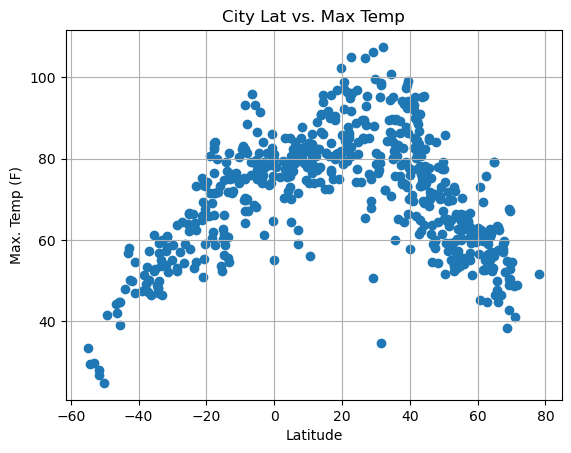

In [94]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Lat vs. Max Temp")
plt.ylabel("Max. Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

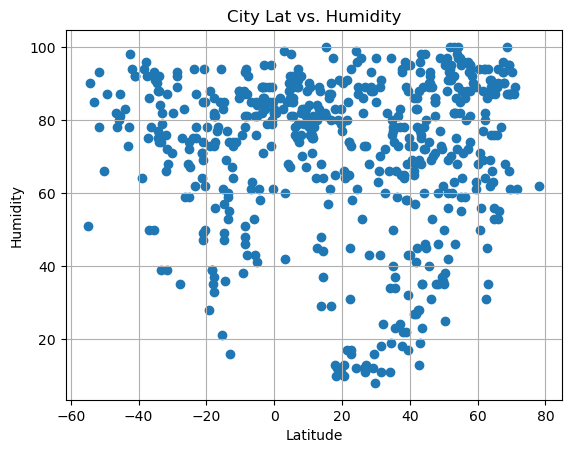

In [95]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Lat vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

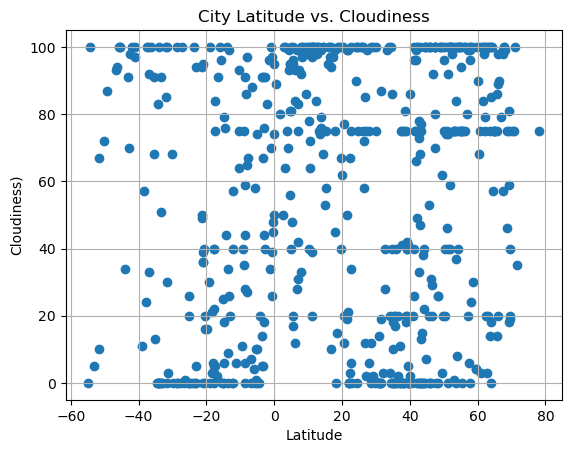

In [96]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

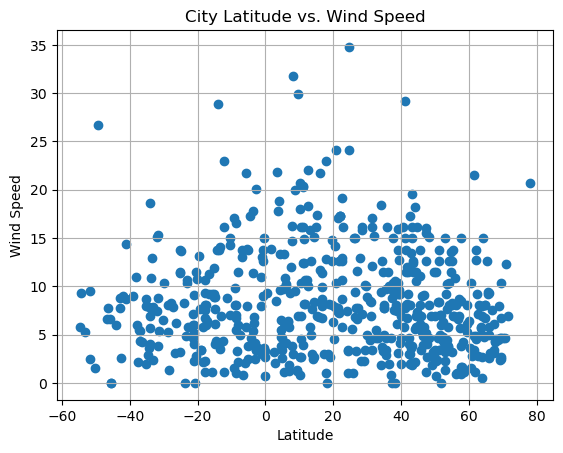

In [98]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
#slope, intercept, r, p, se = linregress(x, y)

In [100]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,75.72,31,20,9.22,CA,1690494439
1,bridgewater,44.3835,-64.5155,78.12,72,100,5.75,CA,1690494439
2,talnakh,69.4865,88.3972,67.21,61,19,4.70,RU,1690494304
4,sterling,39.0062,-77.4286,97.48,58,20,13.80,US,1690494409
5,bilibino,68.0546,166.4372,52.09,68,99,4.52,RU,1690494441


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,papatowai,-46.5619,169.4708,44.15,82,93,6.64,NZ,1690494440
8,puerto ayora,-0.7393,-90.3518,85.96,89,39,8.99,EC,1690494442
10,invercargill,-46.4000,168.3500,42.08,78,94,7.78,NZ,1690494280
11,grytviken,-54.2811,-36.5092,29.46,90,100,9.28,GS,1690494443
12,afaahiti,-17.7500,-149.2833,82.27,86,40,10.65,PF,1690494444


###  Temperature vs. Latitude Linear Regression Plot

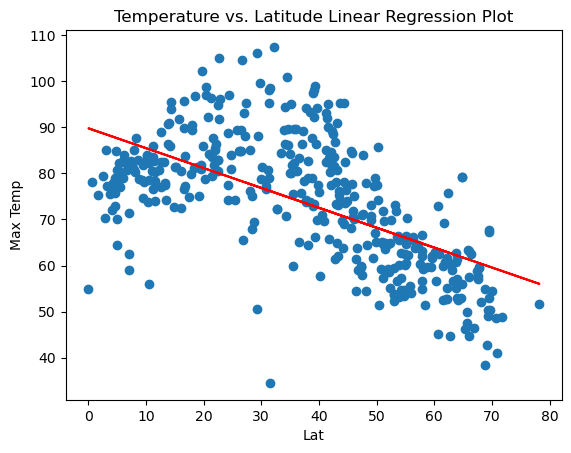

In [111]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

(slope, intercept, r_value, p_value, std_err) = linregress(x, y)
r = x * slope + intercept

plt.scatter(x,y)
plt.plot(x,r,"r")

plt.title('Temperature vs. Latitude Linear Regression Plot')
plt.xlabel("Lat")
plt.ylabel('Max Temp')
plt.show()

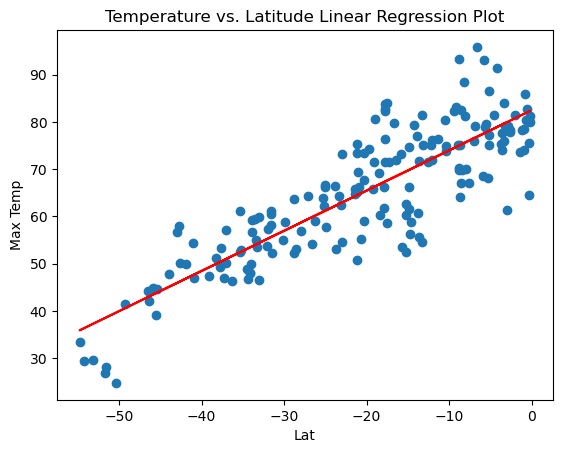

In [112]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

(slope, intercept, r_value, p_value, std_err) = linregress(x, y)
r = x * slope + intercept

plt.scatter(x,y)
plt.plot(x,r,"r")

plt.title('Temperature vs. Latitude Linear Regression Plot')
plt.xlabel("Lat")
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** As temperatures rises in the southern hemisphere we get closer to the Latitude being 0. As temeperature lowers in the nourthern hemisphere we get further away from Latitude of 0.   

### Humidity vs. Latitude Linear Regression Plot

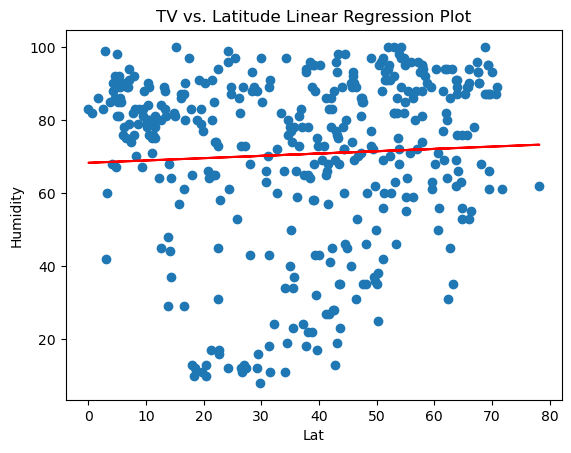

In [113]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

(slope, intercept, r_value, p_value, std_err) = linregress(x, y)
r = x * slope + intercept

plt.scatter(x,y)
plt.plot(x,r,"r")

plt.title('TV vs. Latitude Linear Regression Plot')
plt.xlabel("Lat")
plt.ylabel('Humidity')
plt.show()

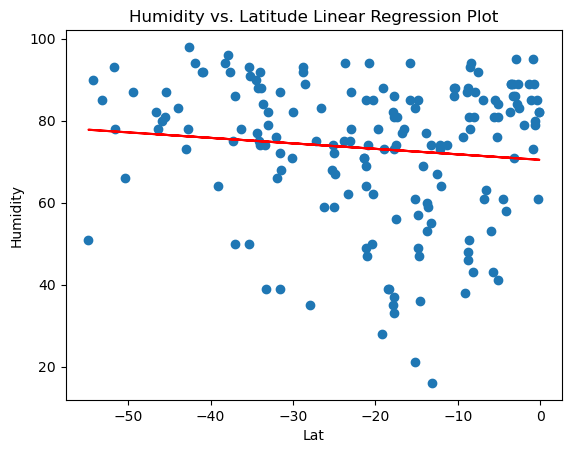

In [114]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

(slope, intercept, r_value, p_value, std_err) = linregress(x, y)
r = x * slope + intercept

plt.scatter(x,y)
plt.plot(x,r,"r")

plt.title('Humidity vs. Latitude Linear Regression Plot')
plt.xlabel("Lat")
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** As humidity lowers in the southern hemisphere we get closer to the Latitude being 0. As humidity rises in the nourthern hemisphere we get further away from Latitude of 0. Both of these are fairly slight slopes.  

### Cloudiness vs. Latitude Linear Regression Plot

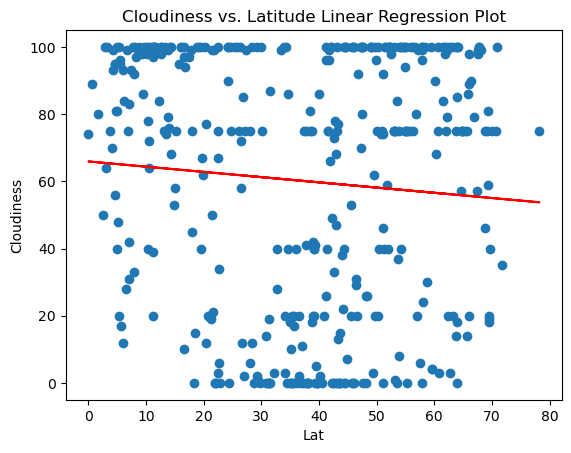

In [115]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

(slope, intercept, r_value, p_value, std_err) = linregress(x, y)
r = x * slope + intercept

plt.scatter(x,y)
plt.plot(x,r,"r")

plt.title('Cloudiness vs. Latitude Linear Regression Plot')
plt.xlabel("Lat")
plt.ylabel('Cloudiness')
plt.show()

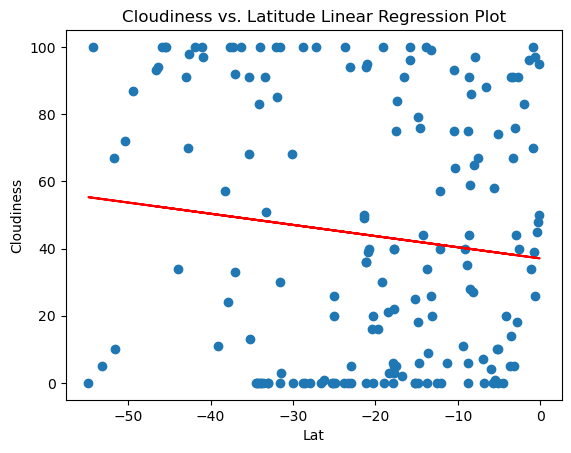

In [116]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

(slope, intercept, r_value, p_value, std_err) = linregress(x, y)
r = x * slope + intercept

plt.scatter(x,y)
plt.plot(x,r,"r")

plt.title('Cloudiness vs. Latitude Linear Regression Plot')
plt.xlabel("Lat")
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** Cloudiness for southern hemisphere goes lower as it approches a Latitude of 0 and for the northern hemisphere cloudiness goes lower as it the Latitude increases. 

### Wind Speed vs. Latitude Linear Regression Plot

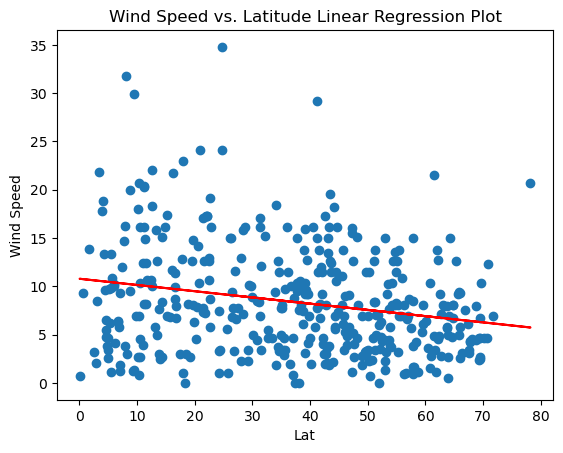

In [117]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

(slope, intercept, r_value, p_value, std_err) = linregress(x, y)
r = x * slope + intercept

plt.scatter(x,y)
plt.plot(x,r,"r")

plt.title('Wind Speed vs. Latitude Linear Regression Plot')
plt.xlabel("Lat")
plt.ylabel('Wind Speed')
plt.show()

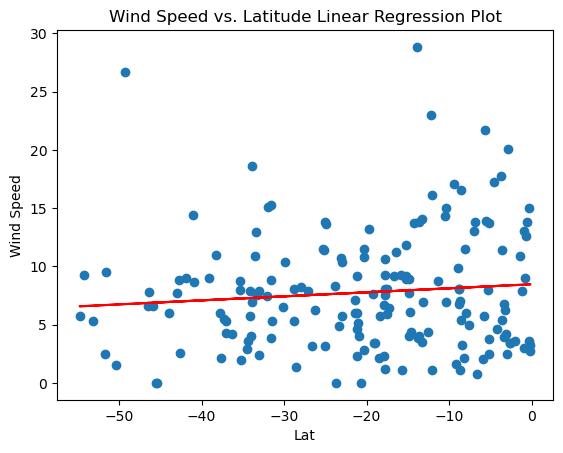

In [118]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

(slope, intercept, r_value, p_value, std_err) = linregress(x, y)
r = x * slope + intercept

plt.scatter(x,y)
plt.plot(x,r,"r")

plt.title('Wind Speed vs. Latitude Linear Regression Plot')
plt.xlabel("Lat")
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The wind speed decreases in the nouthern hemisphere as it gets further away from a Latitude of 0. The wind increses in the southern hemisphere as it gets closer to a Latitude of 0.